In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Problem 24.3
Let $A$ be a $10 \times 10$ random matrix with entries from the standard normal distrubtion, minus twice the identity. Write a program to plot $\begin{Vmatrix} e^{At} \end{Vmatrix}_2$ against $t$ for $0 \leq t \leq 20$ on a log scale, comparing the result to the straight line $e^{t\alpha(A)}$, where $\alpha(A) = \max_j  \text{Re}(\lambda_j)$ is the $\textit{spectral abscissa}$ of $A$. Run the program for ten random matrices $A$ and comment on the results. What property of a matrix leads to a $\begin{Vmatrix} e^{At} \end{Vmatrix}_2$ curve that remains oscillatory as $t \to \infty$?

In [2]:
A = np.random.normal(loc=0, scale=1, size=(10, 10)) - 2 * np.eye(10)

In [3]:
def norm2_mat_exp(A, t=np.linspace(0, 20, 80)):
    """Compute the matrix exponential of a matrix A over a discretized interval t
    """
    return np.array([np.linalg.norm(sp.linalg.expm(A*i), ord=2) for i in t])

In [4]:
def ref_line_func(eig_val, t=np.linspace(0, 20, 80)):
    """Compute the points that will make the reference line using e^{t\alpha(A)}.
    """
    return np.array([np.exp(eig_val*i) for i in t])

In [5]:
def max_eig(A):
    """Compute the max eigenvalue of A
    """
    return np.max(np.linalg.eig(A)[0].real)
    

In [6]:
# Define ten standard normal random 10 x 10 matrices
ten_rand_mats = [np.random.normal(loc=0, scale=1, size=(10, 10)) - 2 * np.eye(10) for i in range(10)]

In [7]:
# Compute the 2-norm of the matrix exponential for each random matrix for 0 <= t <=2
two_norm_mat_exp = [norm2_mat_exp(mat) for mat in ten_rand_mats]

In [8]:
# Compute the Spectral Abscissa for each random matrix
spec_abscis = [max_eig(mat) for mat in ten_rand_mats]

In [9]:
# Compute the straight line e^{t\alpha(A)} for each random matrix
ref_line = [ref_line_func(eig_val) for eig_val in spec_abscis]

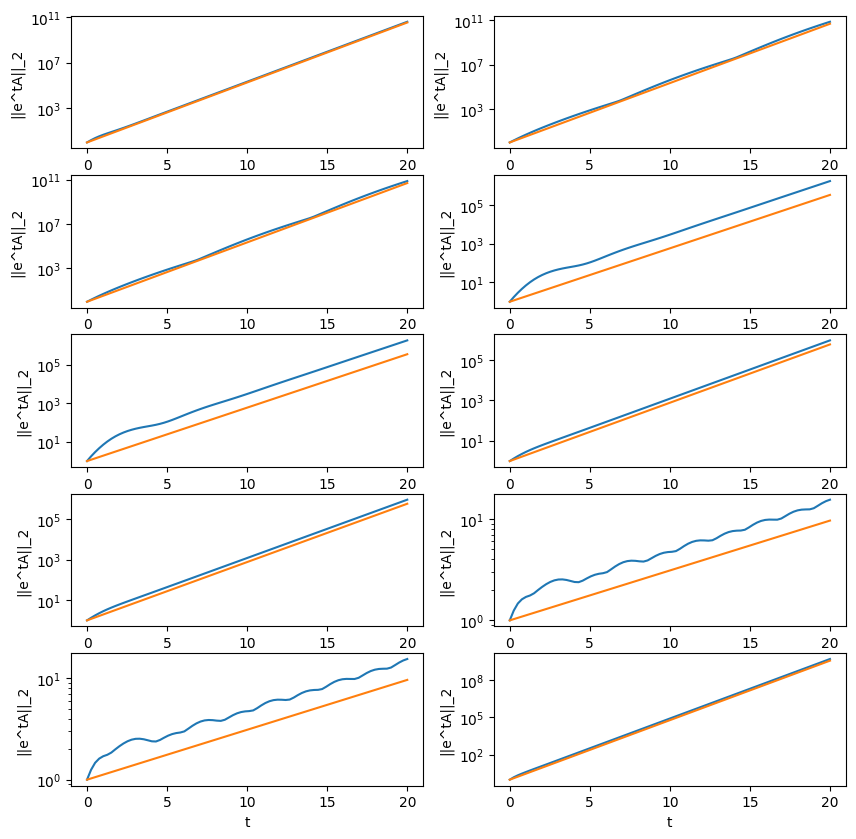

In [32]:
t = np.linspace(0, 20, 80)
fig, axes = plt.subplots(5, 2, figsize=(10, 10))
for i in range(5):
    for j in range(2):
        axes[i, j].plot(t, two_norm_mat_exp[i + j])
        axes[i, j].plot(t, ref_line[i + j])
        axes[i, j].set_yscale('log')
for ax in axes.flat:
    ax.set(xlabel='t', ylabel='||e^tA||_2')
# for ax in axes.flat:
#     ax.label_outer()
plt.show()


Considering the plots above, we see that the max real part of the eigenvalues of $A$ controls the rate of growth of $e^{tA}$ as $t \to \infty$. Oscillations in $e^{tA}$, on the other hand, are controlled by the complex part of the eigenvalues of $A$. This is because $e^{at + ibt} = e^{at} + e^{ibt} = e^{at} + \cos bt + i \sin bt$, by Euler's formula. 